<a href="https://colab.research.google.com/github/romenlaw/NaiveNeuralNetwork/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git

In [4]:
!git config --global user.name "romenlaw"
!git config --global user.email "e"
TOKEN='github_pat_'
!git clone https://$TOKEN@github.com/romenlaw/NaiveNeuralNetwork

Cloning into 'NaiveNeuralNetwork'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 99 (delta 44), reused 21 (delta 5), pack-reused 0
Receiving objects: 100% (99/99), 33.84 KiB | 8.46 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [5]:
%cd /content/NaiveNeuralNetwork

/content/NaiveNeuralNetwork


In [115]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   __pycache__/nnn.cpython-310.pyc
	modified:   nnn.py
	modified:   visualiser.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/visualiser.cpython-310.pyc

no changes added to commit (use "git add" and/or "git commit -a")


In [116]:
!git add nnn.py visualiser.py
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   nnn.py
	modified:   visualiser.py

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   __pycache__/nnn.cpython-310.pyc

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/visualiser.cpython-310.pyc



In [114]:
!git reset

Unstaged changes after reset:
M	__pycache__/nnn.cpython-310.pyc
M	nnn.py
M	visualiser.py


In [117]:
!git commit -m "complete visualiser"

[main cbdde9c] complete visualiser
 2 files changed, 38 insertions(+)


In [118]:
!git push origin main

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 872 bytes | 872.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romenlaw/NaiveNeuralNetwork
   dafe452..cbdde9c  main -> main


# Housekeeping

In [9]:
!pwd

/content/NaiveNeuralNetwork


In [28]:
import sys
sys.path.insert(0, '/content/NaiveNeuralNetwork')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from nnn import Scalar
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualise

In [105]:
a=Scalar(2., label='a')
b=Scalar(3, label='b')
c=b+a; c.label='c'
d=c*a; d.label='d'
e=d+c; e.label='e'
#f=e**Scalar(2, label='g'); f.label='f'
f=Scalar(2, label='g')**e; f.label='f'


In [84]:
tuple(reversed(c._operands))

(b: 3, a: 2.0)

In [85]:
import graphviz
from visualiser import *

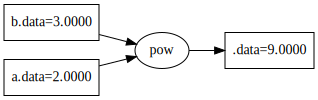

In [110]:
visualise(b**a)

In [111]:
trace(c)

([b: 3, a: 2.0, c: 5.0], {(a: 2.0, c: 5.0), (b: 3, c: 5.0)})

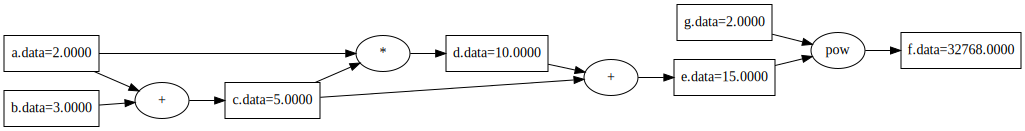

In [103]:
visualise(f)

# Gradient